In [2]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import sys
from copy import deepcopy

#from sklearn.cluster import SpectralClustering
#from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
#from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
import numpy as np

/Users/apple/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)
/Users/apple/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/Users/apple/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavi

In [3]:
import math
from sklearn.neighbors import kneighbors_graph

In [4]:
clustering = pd.read_csv('clustering.csv',header=None)
shape = pd.read_csv('ShapedData.csv',header=None)

data_1=np.array(clustering)
data_2=np.array(shape)

In [5]:
def dist(a,b):
    return np.linalg.norm(a-b)

In [6]:
# Gaussian Similarity Function
def Gaussian_Similarity(x1,x2,sigma):
    return math.exp(-(dist(x1,x2))/(2*(sigma**2)))

In [7]:
# Similarity Matrix
def Similarity_Matrix(X,sigma):
    
    N,d = X.shape
    S = np.zeros((N,N))
    
    for i in range (N):
        for j in range (i,N):
            s = Gaussian_Similarity(X[i],X[j],sigma)
            S[i][j]=s
            S[j][i]=s
    
    return S

In [49]:
# Test
S=Similarity_Matrix(data_1,0.5)
S[10][1999]

dist(data_1[10],data_1[1999])

Gaussian_Similarity(data_1[0], data_1[1], 0.5)

# TEST
N,d = data_1.shape
S = np.zeros((N,N)) # Gaussian Similarity matrix (euclidean) 
W = np.zeros((N,N)) # adjacency matrix

"""
Similarity: store the similarity score between each data point
"""
for i in range (N):
    for j in range (i,N):
        s = Gaussian_Similarity(data_1[i],data_1[j],0.5)
        S[i][j]=s
        S[j][i]=s
        
S[10][1999]

8.734155858027599e-05

In [56]:
result = np.argpartition(S[0], 5)
result
print(result,S[0][result[:5]])

[1728 1766 1736 ...    6    3    0] [7.87303880e-08 1.48797382e-07 1.65555366e-07 1.65637998e-07
 1.66558979e-07]


In [ ]:
#Incomplete
def KNN(X,k):
    
    N,d = X.shape
    D = np.zeros((N,N))
    
    """
    Calculate and store the euclidean distance between each data point to [D]
    """
    for i in range(N):
        for j in range (i,N):
        euclidean = dist(X[i],X[j])
        D[i][j]=euclidean
        D[j][i]=euclidean
        
    for z in range(N):
        r1 = np.argpartition(X[z], k)
        r2 = X[z][]
        
        

In [179]:
def k_means_tol_1(X,K,raw_data): # X: d-dimensional obersvation, K: number of clusters
    index = np.zeros(len(X)) # index matrix
    phi = np.zeros(len(X))
    
    tol= 10**(-5) #convergence threshold
    Y = np.array(random.sample(list(X),K)) # randomly select K oberservation from dataset to set as our initial centers
    Y_old = np.zeros(Y.shape) # new centers awaiting assignment
    con = np.linalg.norm(Y-Y_old,ord=1) # 1-norm btw Y and Y_new
    avg_D=0 # Obj value
    colors = ['r', 'g', 'b','y', 'c', 'm','orange','purple'] # color pallete for plotting cluster
    
    while con > tol:
        
        """
        Assign data to the closest center (with label)
        """
        for i in range(len(X)): # for each observation
            min=9999
            for j in range(0,K): # compare distance with each center
                distances = dist(X[i], Y[j])
                if distances < min:
                    min=distances
                    phi[i] = distances # store the distance to the closest center for each observation
                    index[i] = j # store the index (label) for each observation to locate its closest center
        
        Y_old = deepcopy(Y)
        
        """
        Compute cluster mean and assign it as the new center
        """
        for j in range (K):
            group_data_point=[raw_data[i] for i in range (len(index)) if index[i]==j]
            Y[j] = sum(group_data_point)/len(group_data_point)
            con = np.linalg.norm(Y-Y_old,ord=1)
            #print(con)
            
        """
        D (objective value)
        """
        avg_D = sum(phi)/len(phi)
    
    """
    Plot with color by clusters
    """
    for z in range (K):
        data=np.array([raw_data[i] for i in range (len(index)) if index[i]==z])
        #print(data)
        plt.scatter(data[:, 0], data[:, 1],s=10, c=colors[z])
        plt.scatter(Y[:, 0], Y[:, 1], marker='*', s=150, c='k')
        plt.title('Spectral Clustering_K-means (tol= 1e-5, D=%f)'%(avg_D))
        plt.savefig('Spectral Clustering_K-means (tol= 1e-5, K=%d, D=%f).png'%(K,avg_D))
        
    plt.show()
    
        
    return Y,index,avg_D

In [10]:
def Spectral_Clustering(X,K,sigma):
    
    N,d = X.shape
    #S = np.zeros((N,N)) # Gaussian Similarity matrix (euclidean) 
    W = np.zeros((N,N)) # adjacency matrix
    C = np.zeros(N)
    #Y = 
    
    """
    S: Similarity matrix: store the gaussian similarity value between each data point
    """
    S=Similarity_Matrix(X,sigma) # Gaussian Similarity matrix (euclidean)
        
    """
    A: K-nearest neighborhood structure (knn), in order to determine if there is an edge between nodes or not
    """
    # W = kneighbors_graph(X, n_neighbors=5, metric=S).toarray()
    nrst_neigh = NearestNeighbors(n_neighbors = int(N/K), algorithm = 'ball_tree')
    nrst_neigh.fit(X)
    A = nrst_neigh.kneighbors_graph(X).toarray()
    
    
    """
    W: Weighted Adjacency Matrix [N*N] --> combine S & A
    """
    for i in range(N):
        for j in range (i,N):
            if A[i][j]== 1: #there is an edge between node i and j
                W[i][j]= S[i][j]
                W[j][i]= W[i][j]
            else:
                W[i][j]= 0
                W[j][i]= W[i][j]
    
    """
    D matrix [N*N], degreeness
    """
    diag = np.sum(W, axis=1) #sum each value of each row in adjacency matrix
    D = np.diag(diag) 
    
    """
    Liplacian matrix [N*N]
    """
    L = D-W
    
    
    """
    U: first K eigenvectors [N*K dimension]
    """
    eivals, U = np.linalg.eigh(L)
    U=U[:,-K:]
    
    
    input_data = np.array(U)
    """
    Y: cluster points
    """
    
    
    
    
    """
    C: cluster index vector [N*1 dimension]
    
    for i in range (N):
        for j in range (K):
            if U[i][j] != 0:
                C[i] = j
    """
    
    
    
    #Y,C,D = k_means_tol_1(input_data,K,X)
    
    
    #return S,U,Y,C,D
    
    return W,U,eivals
        

In [11]:
W_1,U_1,eigenvals_1 = Spectral_Clustering(data_1,2,1)

In [16]:
e_1 = sorted(eigenvals_1)

In [18]:
e_1[:5]

[9.776310594622735e-15,
 38.28131978864014,
 64.33521494036857,
 83.15527174535212,
 87.29728893004602]

In [30]:
W_2,U_2,eigenvals_2 = Spectral_Clustering(data_2,4,1)

In [31]:
e_2 = sorted(eigenvals_2)

In [32]:
e_2[:5]

[-2.981099610623809e-13,
 30.91518108552902,
 48.087860947490064,
 92.9776190933201,
 150.81781338648318]

In [27]:
Y = np.transpose(U_1)
YY=Y[:2]
YY.shape
Y.shape

(2, 2000)

In [28]:
U_1.shape

(2000, 2)

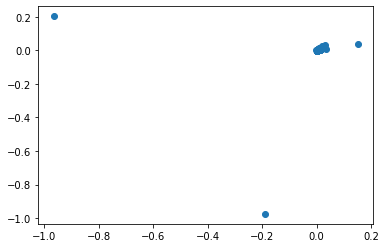

In [29]:
plt.scatter(U_1[:,0],U_1[:,1])

(2000, 2)


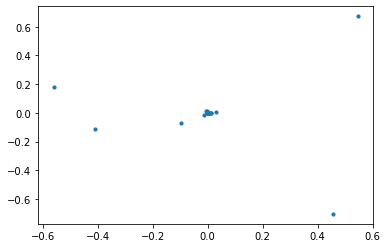

In [190]:
print(U.shape)
plt.scatter(U[:, 0], U[:, 1],s=10)


In [188]:
W,U= Spectral_Clustering(data_1,2,0.25)
print("W: ",W,"\n\nU: ",U)

W:  [[1.00000000e+00 7.91367402e-05 3.26429548e-07 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [7.91367402e-05 1.00000000e+00 4.07692616e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.26429548e-07 4.07692616e-03 1.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.00000000e+00
  2.29883738e-11 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.29883738e-11
  1.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]] 

U:  [[-8.93790389e-19  7.26862001e-29]
 [ 2.50360332e-18  1.62728413e-17]
 [-4.72516727e-17  1.58413611e-17]
 ...
 [-3.21927759e-13 -1.33310672e-13]
 [-7.93149775e-08  5.27129120e-10]
 [-3.35876198e-16 -5.07871294e-16]]


In [172]:
W,U,Y,C,D= Spectral_Clustering(data_2,4,0.25)
print("W: ",W,"\n\nU: ",U,"\n\nY: ",Y,"\n\nC: ",C,"\n\nD: ",D)

W:  [[1.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.00000000e+00 1.45366468e-04 ... 0.00000000e+00
  1.50534786e-13 0.00000000e+00]
 [0.00000000e+00 1.45366468e-04 1.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.00000000e+00
  1.42107593e-04 0.00000000e+00]
 [0.00000000e+00 1.50534786e-13 0.00000000e+00 ... 1.42107593e-04
  1.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]] 

U:  [[-9.12667514e-14 -3.31215519e-24  1.64747664e-23 -5.40685593e-22]
 [ 1.33859762e-17  9.47314181e-18  8.30360432e-18  6.14062001e-18]
 [ 1.26540212e-17 -1.00745973e-17  4.59399706e-18  2.14347775e-17]
 ...
 [ 8.63684937e-15 -3.39295231e-15  6.73338017e-16 -1.92449580e-15]
 [-7.03105109e-17  6.07663183e-18 -5.32695346e-19 -1.79265422e-18]
 [ 1.63172427e-17  2.26810093e-18  6.60092826e-18 

In [174]:
np.array(U)

array([[-9.12667514e-14, -3.31215519e-24,  1.64747664e-23,
        -5.40685593e-22],
       [ 1.33859762e-17,  9.47314181e-18,  8.30360432e-18,
         6.14062001e-18],
       [ 1.26540212e-17, -1.00745973e-17,  4.59399706e-18,
         2.14347775e-17],
       ...,
       [ 8.63684937e-15, -3.39295231e-15,  6.73338017e-16,
        -1.92449580e-15],
       [-7.03105109e-17,  6.07663183e-18, -5.32695346e-19,
        -1.79265422e-18],
       [ 1.63172427e-17,  2.26810093e-18,  6.60092826e-18,
        -4.47669870e-18]])

In [173]:
data_2[:5]

array([[ 2.1865, -1.226 ],
       [ 5.9486, -2.3155],
       [ 4.9435, -2.7735],
       [-1.0944,  1.2621],
       [ 3.6613, -3.6604]])

In [123]:
U.shape

(4460, 5)

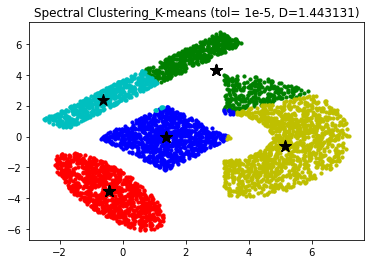

(array([[-0.43282777, -3.531065  ],
        [ 2.95203638,  4.34063005],
        [ 1.37349716, -0.05435036],
        [ 5.14428358, -0.59524204],
        [-0.6207116 ,  2.3696547 ]]),
 array([2., 3., 3., ..., 1., 3., 0.]),
 1.4431309904404874)

In [120]:
k_means_tol_1(data_2,5)

In [113]:
U

array([[ 9.49535457e-20,  1.40251758e-09,  4.15196279e-23,
         1.77717891e-24, -1.32639704e-24],
       [ 1.61041190e-18, -2.97539513e-18,  4.79230340e-18,
         7.32360988e-18, -3.28160656e-17],
       [-8.17084832e-18, -3.75835136e-17,  1.70349479e-17,
        -9.87805117e-18, -1.20309828e-18],
       ...,
       [-5.63264408e-16, -1.25236193e-15, -3.42169612e-15,
         6.83024715e-16, -1.95456889e-15],
       [-3.80351009e-17,  1.25062721e-16,  5.06311365e-18,
        -2.97623223e-18, -2.56921528e-17],
       [-6.40174352e-19,  8.67361738e-19, -1.00654343e-17,
        -1.76835089e-19, -1.56560327e-17]])

In [ ]:
K=5


for j in range (K):
            group_data_point=[X[i] for i in range (len(index)) if index[i]==j]
            Y[j] = sum(group_data_point)/len(group_data_point)
            con = np.linalg.norm(Y-Y_old,ord=1)
            #print(con)
            
        """
        D (objective value)
        """
        avg_D = sum(phi)/len(phi)
    
    """
    Plot with color by clusters
    """
    for z in range (K):
        data=np.array([X[i] for i in range (len(index)) if index[i]==z])
        plt.scatter(data[:, 0], data[:, 1],s=10, c=colors[z])
        plt.scatter(Y[:, 0], Y[:, 1], marker='*', s=150, c='k')
        plt.title('K-means (tol= 1e-5, D=%f)'%(avg_D))
        plt.savefig('K-means (tol= 1e-5, K=%d, D=%f).png'%(K,avg_D))
        
    plt.show()

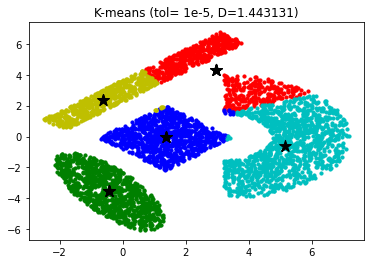

(array([[1.00000000e+00, 2.46631799e-14, 1.03615970e-11, ...,
         2.60642909e-13, 2.05532314e-12, 1.35614855e-14],
        [2.46631799e-14, 1.00000000e+00, 1.45366468e-04, ...,
         3.02326127e-17, 1.50534786e-13, 3.05304533e-24],
        [1.03615970e-11, 1.45366468e-04, 1.00000000e+00, ...,
         1.30736348e-17, 2.64597307e-14, 1.83523241e-20],
        ...,
        [2.60642909e-13, 3.02326127e-17, 1.30736348e-17, ...,
         1.00000000e+00, 1.42107593e-04, 6.29381430e-27],
        [2.05532314e-12, 1.50534786e-13, 2.64597307e-14, ...,
         1.42107593e-04, 1.00000000e+00, 2.81084248e-26],
        [1.35614855e-14, 3.05304533e-24, 1.83523241e-20, ...,
         6.29381430e-27, 2.81084248e-26, 1.00000000e+00]]),
 array([[-7.43851853e-22, -9.13261792e-14, -9.91879901e-23,
         -2.01872868e-23,  1.03397577e-25],
        [-5.31292427e-19, -1.37701579e-17, -1.86115749e-18,
          3.40764168e-17,  1.21537355e-17],
        [-1.87310221e-18, -8.57505304e-18, -1.12368352e-1

In [93]:
Spectral_Clustering(data_2,5,0.25)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

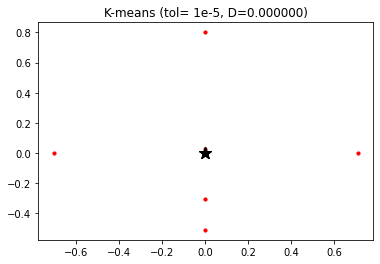

In [97]:
S,U,Y,C,D = Spectral_Clustering(data_2,4,0.1)

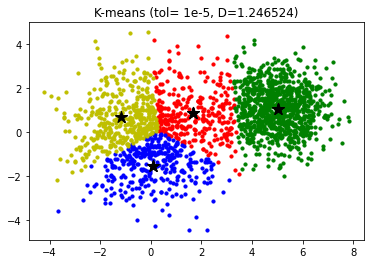

In [92]:
S,U,Y,C,D=Spectral_Clustering(data_1,4,0.5)

In [57]:
S=Similarity_Matrix(data_1,0.5)

In [71]:
W = kneighbors_graph(data_1, n_neighbors=10).toarray()
W

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [77]:
S

array([[1.00000000e+00, 9.43179905e-02, 2.39027223e-02, ...,
        3.49127018e-07, 1.07331026e-04, 2.92179391e-06],
       [9.43179905e-02, 1.00000000e+00, 2.52687182e-01, ...,
        6.36544465e-08, 2.50708322e-05, 2.05529093e-06],
       [2.39027223e-02, 2.52687182e-01, 1.00000000e+00, ...,
        2.06078887e-08, 8.70488606e-06, 1.24982946e-06],
       ...,
       [3.49127018e-07, 6.36544465e-08, 2.06078887e-08, ...,
        1.00000000e+00, 2.18966191e-03, 6.85734413e-05],
       [1.07331026e-04, 2.50708322e-05, 8.70488606e-06, ...,
        2.18966191e-03, 1.00000000e+00, 1.49965854e-03],
       [2.92179391e-06, 2.05529093e-06, 1.24982946e-06, ...,
        6.85734413e-05, 1.49965854e-03, 1.00000000e+00]])

In [76]:
diag = np.sum(S, axis=1)
diag.shape
D= np.diag(diag)
L = D-S
L

array([[ 7.03987510e+01, -9.43179905e-02, -2.39027223e-02, ...,
        -3.49127018e-07, -1.07331026e-04, -2.92179391e-06],
       [-9.43179905e-02,  7.88359084e+01, -2.52687182e-01, ...,
        -6.36544465e-08, -2.50708322e-05, -2.05529093e-06],
       [-2.39027223e-02, -2.52687182e-01,  6.33390013e+01, ...,
        -2.06078887e-08, -8.70488606e-06, -1.24982946e-06],
       ...,
       [-3.49127018e-07, -6.36544465e-08, -2.06078887e-08, ...,
         1.97889112e+01, -2.18966191e-03, -6.85734413e-05],
       [-1.07331026e-04, -2.50708322e-05, -8.70488606e-06, ...,
        -2.18966191e-03,  1.38405642e+02, -1.49965854e-03],
       [-2.92179391e-06, -2.05529093e-06, -1.24982946e-06, ...,
        -6.85734413e-05, -1.49965854e-03,  9.68477458e+00]])

In [78]:
eivals, U = np.linalg.eigh(L)
U

array([[-2.23606798e-02,  5.91463149e-04, -4.70805551e-03, ...,
        -1.02052359e-11,  4.39889536e-11, -1.77193336e-11],
       [-2.23606798e-02,  7.02383090e-04, -4.85311406e-03, ...,
        -4.52080140e-13, -4.36824280e-12,  5.31786575e-13],
       [-2.23606798e-02,  7.84998056e-04, -5.06309509e-03, ...,
        -4.56076493e-14, -2.19148611e-12,  4.27065736e-13],
       ...,
       [-2.23606798e-02, -1.77340017e-03,  6.52216657e-03, ...,
        -5.71015667e-10, -6.12901444e-09,  1.69075653e-08],
       [-2.23606798e-02, -1.59734051e-03,  5.60214274e-03, ...,
         9.07936114e-06, -2.91911117e-05,  1.25950426e-05],
       [-2.23606798e-02, -1.77388213e-03,  6.55077068e-03, ...,
         3.81973405e-09,  1.06740122e-09,  3.82112075e-09]])

In [79]:
U.shape

(2000, 2000)

In [84]:
U[:,-2:]

array([[ 4.39889536e-11, -1.77193336e-11],
       [-4.36824280e-12,  5.31786575e-13],
       [-2.19148611e-12,  4.27065736e-13],
       ...,
       [-6.12901444e-09,  1.69075653e-08],
       [-2.91911117e-05,  1.25950426e-05],
       [ 1.06740122e-09,  3.82112075e-09]])

In [102]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

nrst_neigh = NearestNeighbors(n_neighbors = 1000, algorithm = 'ball_tree')
nrst_neigh.fit(data_1)
nrst_neigh.kneighbors_graph(data_1).toarray()

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 1.]])

In [103]:
n=nrst_neigh.kneighbors_graph(data_1).toarray()
n.shape

(2000, 2000)